# MAT555E TERM PROJECT

The aim of the project is to make useful the data set that I obtained from various sources and which is useless in its current state, and to make various analyzes on this data.

First of all, since the columns with missing values of the data set contain completely numerical values, the missing data were estimated with the help of linear interpolation and decision tree regressor methods.

I took 3 different approaches while applying linear regression. I will explain these methods in order in the relevant lines below.

In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.formula.api import ols
from scipy import interpolate

data= pd.read_excel("Fields_Summary.xlsx")

data.drop(["Project", "Location", "Term", "Injection_Pressure", "Coal Gasified.1",
           "Production_Pressure", "Thermal_Efficiency", "Duration",
            "Electrical Power", "coal consumed / injected gas"], axis= 1, inplace= True)
data= data.dropna(thresh=1)
data=data.drop(labels=[4,21,22], axis=0)

data = pd.get_dummies(data, columns = ['Coal_Rank'])
data.dtypes


X= data.drop("Injected Gas", axis= 1)
y= data["Injected Gas"]

In the method below, linear interpolation is done in forward, backward and both directions, row and column. In short, all directions and all axis were interpolated, but the score of the logistic regression made with this method was below what I expected.

In [3]:
XX= X.interpolate(axis=0, limit_direction= "both", method= "linear" )

In [4]:
X_train, X_test, y_train, y_test= train_test_split(XX, y, test_size= 0.25, random_state= 100)

lg= LogisticRegression(max_iter= 5000)
lg.fit(X_train, y_train)
lg.score(X_test, y_test)

0.42857142857142855

In the 2nd linear interpolation method to fill in missing cells, I compared columns with missing data cells with columns without missing data cells. Here, I tried to take the 2 columns that are most compatible with each other (one with a missing cell, the other not), interpolate the missing data cell with respect to the other and complete it.

However, although I do not have a method to measure the accuracy of the data I obtained here, the data I obtained did not meet my expectations in this method either, since I filled the data myself and therefore knew the values in the data set.

In [5]:
colm= data[['LHV', 'C']]
colm= colm.interpolate(axis=0, limit_direction= "both", method= "linear" )
colm

,LHV,C
0,18.70,91.440
1,20.60,91.440
2,32.10,91.440
3,25.54,76.790
5,20.00,73.400
6,20.00,73.400
7,20.00,73.400
8,20.00,73.400
9,20.00,73.400
10,20.00,73.400


In [545]:
from scipy.interpolate import interp1d

missing= colm.isna().any(axis=1)
colm_training = colm[~missing]
colm_missing = colm[missing].reset_index(drop=True)
f1= interp1d(colm_training.LHV, colm_training.C)

colm_missing["C"] = f1(colm_missing.LHV)
colm_missing

,LHV,C


Moisture                0
Ash                     0
VM                      0
LHV                     0
FixC                    0
C                       6
H                       6
O                       6
N                       6
S                       6
GHV                     0
Injected Gas            0
Gas yield               1
Coal Gasified           2
Gas_Produced            2
Thermal Power           2
Gas_Injected           11
Injection Rate         10
Production Rate         7
Coal_Rank_Bit.          0
Coal_Rank_HV Bit. C     0
Coal_Rank_Lignite       0
Coal_Rank_Semi Ant.     0
Coal_Rank_Sub Bit.      0
dtype: int64


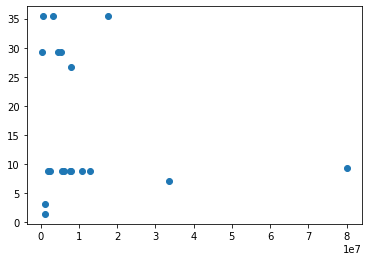

In [7]:
data1= data

data1= data1.drop([23,24,25,26], axis= 0)
print(data1.isnull().sum())
plt.scatter(data1["Gas_Produced"], data1["Moisture"])

In [9]:
data.isnull().sum()

Moisture                0
Ash                     0
VM                      0
LHV                     0
FixC                    0
C                       6
H                       6
O                       6
N                       6
S                       6
GHV                     0
Injected Gas            0
Gas yield               1
Coal Gasified           2
Gas_Produced            2
Thermal Power           3
Gas_Injected           11
Injection Rate         11
Production Rate        11
Coal_Rank_Bit.          0
Coal_Rank_HV Bit. C     0
Coal_Rank_Lignite       0
Coal_Rank_Semi Ant.     0
Coal_Rank_Sub Bit.      0
dtype: int64

In my last method, I created a linear regression and decision tree regressor model for the columns with each missing data cell to fill in the missing data cells. In this method, based on various statistical methods, I identified the columns with the most missing data and the ones with the highest score. And I just set up regression models created by these columns. I then filled in the missing cells based on the other columns.

1. Note: For some, I used the linear regression model, although I got a better score in the decision tree regressor model. This is because the confidence interval I got from the decision tree model was not good enough.

2. Note: Since I run every model I have built many times, I did not write a code for the confidence interval.

The biggest problem I encountered here was the difference between the train and test scores. I tried various methods to solve this problem, but in some of them I couldn't get the difference I wanted. The reason for this is the poor quality of the data set and the low number of rows (at least i guess so).

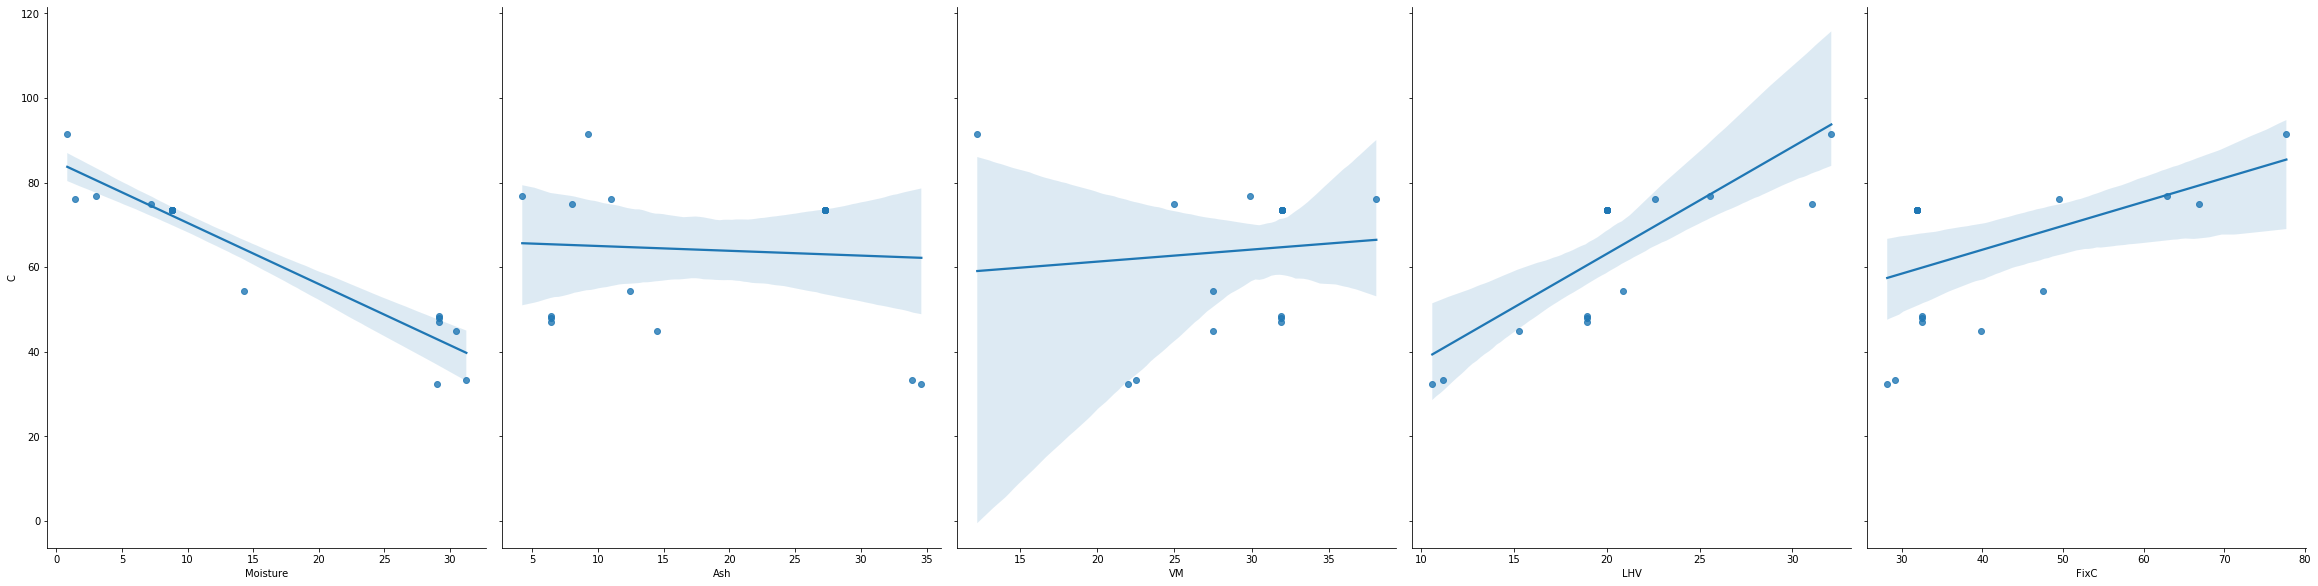

In [10]:
data= pd.read_excel("Fields_Summary.xlsx")

data.drop(["Project", "Term", "Injection_Pressure", "Coal Gasified.1",
           "Production_Pressure", "Thermal_Efficiency", "Duration",
            "Electrical Power", "coal consumed / injected gas"], axis= 1, inplace= True)
data= data.dropna(thresh=1)
data=data.drop(labels=[4,21,22], axis=0)

data = pd.get_dummies(data, columns = ['Coal_Rank'])
data = pd.get_dummies(data, columns = ['Location'])
data2= data
data2.drop(["Gas yield", "H", "O", "N", "S", "Coal Gasified", "Gas_Produced", "Thermal Power", "Gas_Injected", 
            "Injection Rate", "Production Rate", "Injected Gas"], axis= 1, inplace= True)

data2.isnull().sum()
data2.dropna(inplace=True)
sns.pairplot(data2, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC'], y_vars='C', height=8, aspect=0.8, kind='reg')

In [550]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
import numpy as np


X1= data2.drop(["C"], axis= 1)
y1= data2["C"]


X1_train, X1_test, y1_train, y1_test= train_test_split(X1,y1,test_size=0.40, random_state=40)

Linear1= LinearRegression()
DT1= DecisionTreeRegressor()
Linear1.fit(X1_test, y1_test)
DT1.fit(X1_test, y1_test)
print(Linear1.score(X1_train, y1_train))
print(DT1.score(X1_train, y1_train))
predict_data= np.array([[7, 28.5, 36, 20.6, 28.5, 5.6, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]])

print(Linear1.predict(predict_data))

Linear1.coef_

0.8601250419918113
0.7065347350450177
[75.15718239]


array([-0.33735043,  0.77384602,  0.70516961,  2.71383306,  0.2718734 ,
        0.26650367, -2.34306008,  0.97018384,  0.5811747 ,  0.79170153,
        0.        ,  0.        ,  0.79170153,  0.        ,  2.0879051 ,
       -2.87960664])

The reason why the Excel files are different, to avoid confusion, I opened a separate excel file for each column I filled in.

Also, some rows and columns were removed directly from excel. This is because they either have a lot of missing data or are unnecessary.

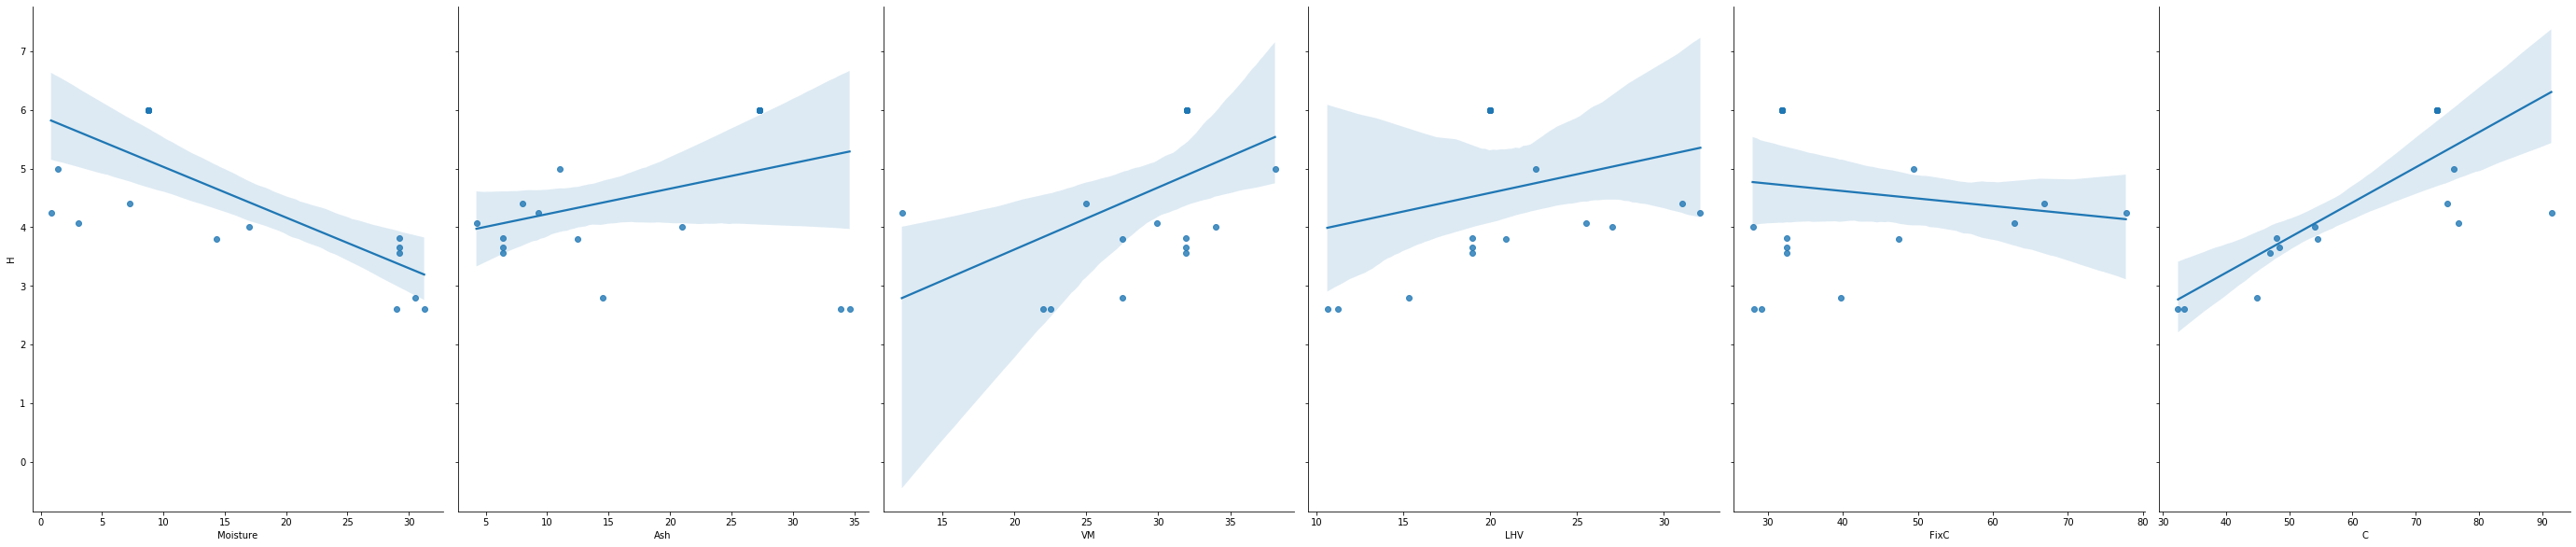

In [12]:
data3= pd.read_excel("Fields_Summary1.xlsx")
data3 = pd.get_dummies(data3, columns = ['Coal_Rank'])
data3 = pd.get_dummies(data3, columns = ['Location'])
data3.drop(["Injected Gas"], axis= 1, inplace= True)

data3.drop(["O", "N", "S", "Gas yield", "Coal Gasified", "Gas_Produced", 
                   "Thermal Power", "Gas_Injected", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)

data3.dropna(inplace=True)
sns.pairplot(data3, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'C'], y_vars='H', height=8, aspect=0.8, kind='reg')

In [13]:

X2= data3.drop(["H"], axis= 1)
y2= data3["H"]

X2_train, X2_test, y2_train, y2_test= train_test_split(X2,y2,test_size=0.5, random_state=50)

Linear2= LinearRegression()
DT2= DecisionTreeRegressor()
Linear2.fit(X2_train, y2_train)
DT2.fit(X2_train, y2_train)
print(Linear2.score(X2_test, y2_test))
print(DT2.score(X2_test, y2_test))

predict_data1= np.array([[26.60, 5.40, 31.8, 20.80, 36.20, 54.59, 7.45, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])
Linear2.predict(predict_data1)


0.9125636364956515
0.6909187030075187


array([3.90614545])

Moisture               0
Ash                    0
VM                     0
LHV                    0
FixC                   0
C                      0
H                      0
O                      0
GHV                    0
Coal_Rank_Bit.         0
Coal_Rank_HV Bit. C    0
Coal_Rank_Lignite      0
Coal_Rank_Semi Ant.    0
Coal_Rank_Sub Bit.     0
Location_Australia     0
Location_Belgium       0
Location_Poland        0
Location_US            0
Location_USSR          0
dtype: int64


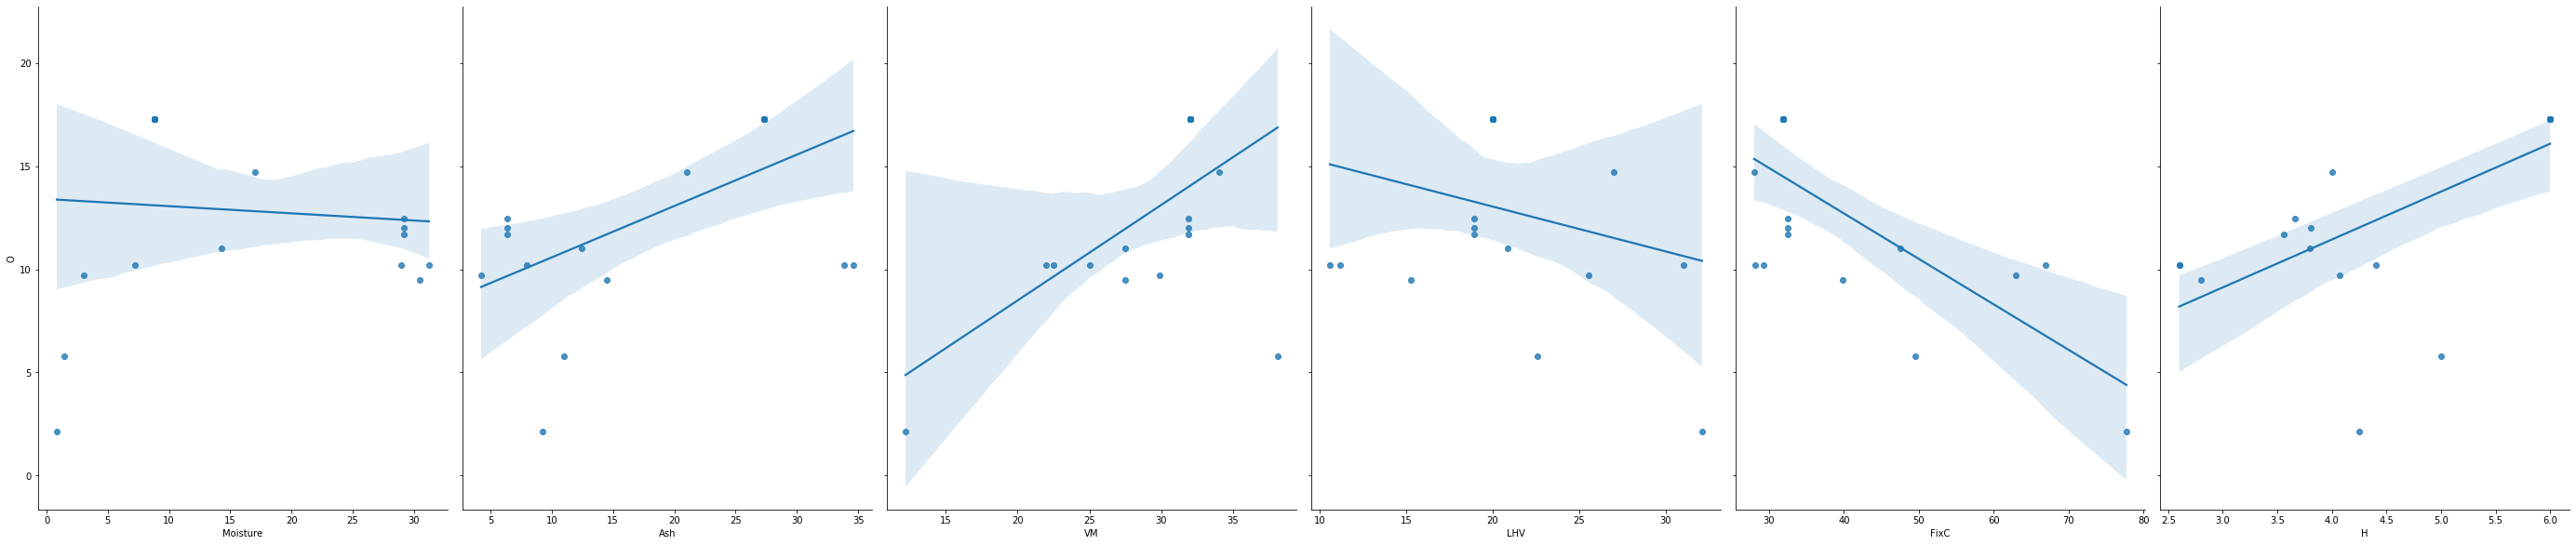

In [14]:
data4= pd.read_excel("Fields_Summary2.xlsx")
data4 = pd.get_dummies(data4, columns = ['Coal_Rank'])
data4 = pd.get_dummies(data4, columns = ['Location'])
data4.drop(["Injected Gas"], axis= 1, inplace= True)

data4.drop(["N", "S", "Gas yield", "Coal Gasified", "Gas_Produced", 
                   "Thermal Power", "Gas_Injected", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
data4.dropna(inplace=True)
print(data4.isnull().sum())
sns.pairplot(data4, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'H'], y_vars='O', height=8, aspect=0.8, kind='reg')

In [15]:
X3= data4.drop(["O"], axis= 1)
y3= data4["O"]

X3_train, X3_test, y3_train, y3_test= train_test_split(X3,y3,test_size=0.25, random_state=50)

Linear3= LinearRegression()
DT3= DecisionTreeRegressor()
Linear3.fit(X3_train, y3_train)
DT3.fit(X3_train, y3_train)
print(Linear3.score(X3_test, y3_test))
print(DT3.score(X3_test, y3_test))

predict_data2= np.array([[9.3, 32.7, 31.4, 18.7, 26.7, 71.41, 6.01,5.1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]])
Linear3.predict(predict_data2)

Linear3.coef_

0.9017312867860984
0.9894200886067579


array([ 1.55727103e-01, -2.21707085e-01, -5.11012665e-01,  1.68507487e-01,
       -9.21682692e-01,  6.12903226e-01, -1.43225806e+00, -2.97338628e-16,
        2.96338716e+00,  1.05996536e+00, -2.36619953e+00, -2.71711834e+00,
        1.05996536e+00,  0.00000000e+00, -2.71711834e+00,  4.83611042e+00,
       -5.09481794e+00,  2.97582587e+00])

    Moisture    Ash    VM    LHV   FixC      C     H      O     N        GHV  \
0       9.30  32.70  31.4  18.70  26.70  71.41  6.02  24.16   NaN   5.100000   
1       7.00  28.50  36.0  20.60  28.50  80.60  6.61  26.22   NaN   5.600000   
2       0.83   9.25  12.2  32.10  77.72  91.44  4.25   2.15  1.29   4.500000   
3       3.04   4.25  29.9  25.54  62.89  76.79  4.07   9.73  1.33   3.380000   
4      17.00  21.00  34.0  27.00  28.00  54.00  4.00  14.70  1.00   9.700000   
5       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80   4.690000   
6       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80   5.660000   
7       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80   6.520000   
8       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80   5.140000   
9       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80   5.140000   
10      8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80   3.910000   
11      8.80  27.30  32.0  20.00  31.90 

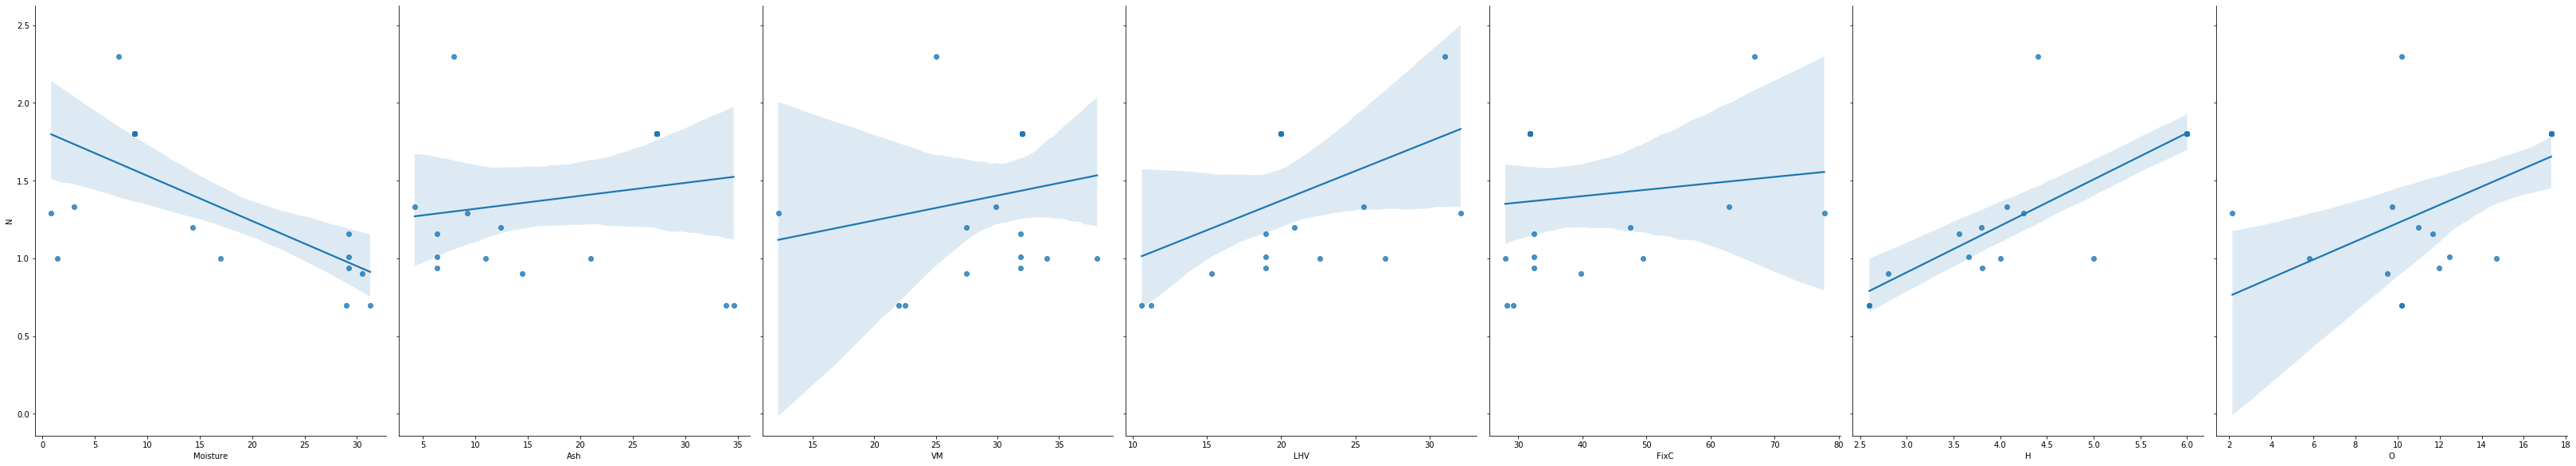

In [16]:
data5= pd.read_excel("Fields_Summary3.xlsx")
data5 = pd.get_dummies(data5, columns = ['Coal_Rank'])
data5 = pd.get_dummies(data5, columns = ['Location'])
data5.drop(["Injected Gas"], axis= 1, inplace= True)

data5.drop(["S", "Gas yield", "Coal Gasified", "Gas_Produced", 
                   "Thermal Power", "Gas_Injected", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
print(data5)
data5.dropna(inplace=True)
print(data5.isnull().sum())
sns.pairplot(data5, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'H', 'O'], y_vars='N', height=8, aspect=0.8, kind='reg')

In [17]:
X4= data5.drop(["N", "VM"], axis= 1)
y4= data5["N"]

X4_train, X4_test, y4_train, y4_test= train_test_split(X4,y4,test_size=0.50, random_state=76)

Linear4= LinearRegression()
DT4= DecisionTreeRegressor()
Linear4.fit(X4_train, y4_train)
DT4.fit(X4_train, y4_train)
print(Linear4.score(X4_test, y4_test))
print(DT4.score(X4_test, y4_test))

predict_data3= np.array([[9.3, 32.7, 18.7, 26.7, 71.41, 6.02, 24.16, 5.1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]])
DT4.predict(predict_data3)



0.8717264243314833
0.9315493319773582


array([1.8])

    Moisture    Ash    VM    LHV   FixC      C     H      O     N     S  \
0       9.30  32.70  31.4  18.70  26.70  71.41  6.02  24.16  1.80   NaN   
1       7.00  28.50  36.0  20.60  28.50  80.60  6.61  26.22  1.00   NaN   
2       0.83   9.25  12.2  32.10  77.72  91.44  4.25   2.15  1.29  0.87   
3       3.04   4.25  29.9  25.54  62.89  76.79  4.07   9.73  1.33  0.79   
4      17.00  21.00  34.0  27.00  28.00  54.00  4.00  14.70  1.00  1.00   
5       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
6       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
7       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
8       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
9       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
10      8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
11      8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50   
12      1.40  11.00  38.1

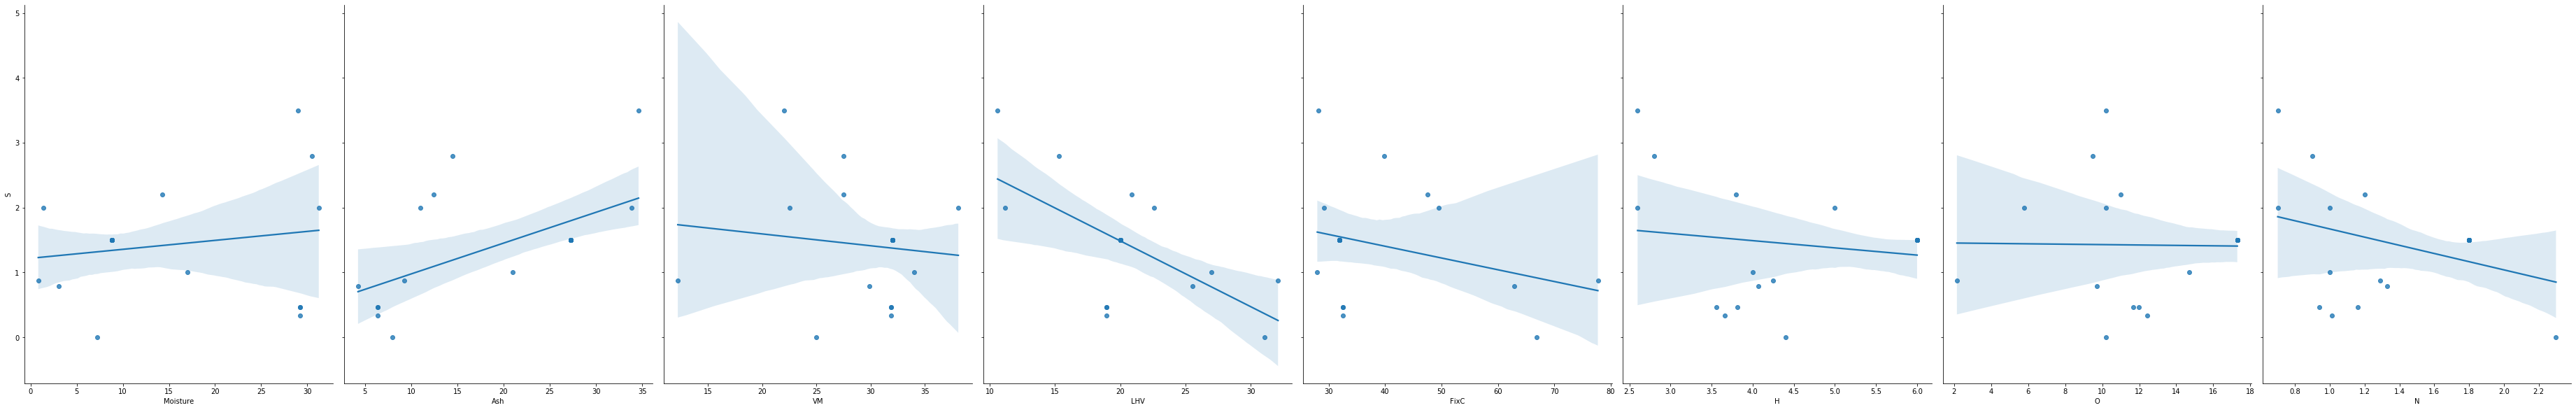

In [553]:
data6= pd.read_excel("Fields_Summary4.xlsx")
#data6 = pd.get_dummies(data6, columns = ['Coal_Rank'])
data6 = pd.get_dummies(data6, columns = ['Location'])
data6.drop(["Injected Gas"], axis= 1, inplace= True)

data6.drop(["Coal_Rank", "Gas yield", "Coal Gasified", "Gas_Produced", 
                   "Thermal Power", "Gas_Injected", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
print(data6)
data6.dropna(inplace=True)
print(data6.isnull().sum())
sns.pairplot(data6, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'H', 'O', 'N'], 
             y_vars='S', height=8, aspect=0.8, kind='reg')

In [558]:
X5= data6.drop(["S"], axis= 1)
y5= data6["S"]

X5_train, X5_test, y5_train, y5_test= train_test_split(X5,y5,test_size=0.25, random_state=50)

Linear5= LinearRegression()
DT5= DecisionTreeRegressor(splitter= "best", criterion= "friedman_mse")
Linear5.fit(X5_train, y5_train)
DT5.fit(X5_train, y5_train)
print(Linear5.score(X5_test, y5_test))
print(DT5.score(X5_test, y5_test))


predict_data4= np.array([[9.3, 32.70, 31.4, 18.70, 26.70, 71.41, 6.02, 24.16, 1.80, 5.1, 1, 0, 0, 0, 0]])
print(DT5.predict(predict_data4))

Linear5.coef_

-4.772067386913163
0.7988870967741936
[1.5]


array([ 2.11034746e-01,  1.73737107e-01,  2.97346366e-01,  1.27869464e-01,
        2.14398722e-01, -3.05243897e-02,  9.32559953e-01, -5.63886371e-02,
        8.29036027e-01, -3.01734219e-17, -1.11022302e-16,  2.64378437e-02,
       -7.80994449e-01, -4.29112397e-01,  1.18366900e+00])

    Moisture    Ash    VM    LHV   FixC      C     H      O     N     S  ...  \
0       9.30  32.70  31.4  18.70  26.70  71.41  6.02  24.16  1.80  2.13  ...   
1       7.00  28.50  36.0  20.60  28.50  80.60  6.61  26.22  1.00  1.81  ...   
2       0.83   9.25  12.2  32.10  77.72  91.44  4.25   2.15  1.29  0.87  ...   
3       3.04   4.25  29.9  25.54  62.89  76.79  4.07   9.73  1.33  0.79  ...   
4      17.00  21.00  34.0  27.00  28.00  54.00  4.00  14.70  1.00  1.00  ...   
5       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50  ...   
6       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50  ...   
7       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50  ...   
8       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50  ...   
9       8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50  ...   
10      8.80  27.30  32.0  20.00  31.90  73.40  6.00  17.30  1.80  1.50  ...   
11      8.80  27.30  32.0  20.00  31.90 

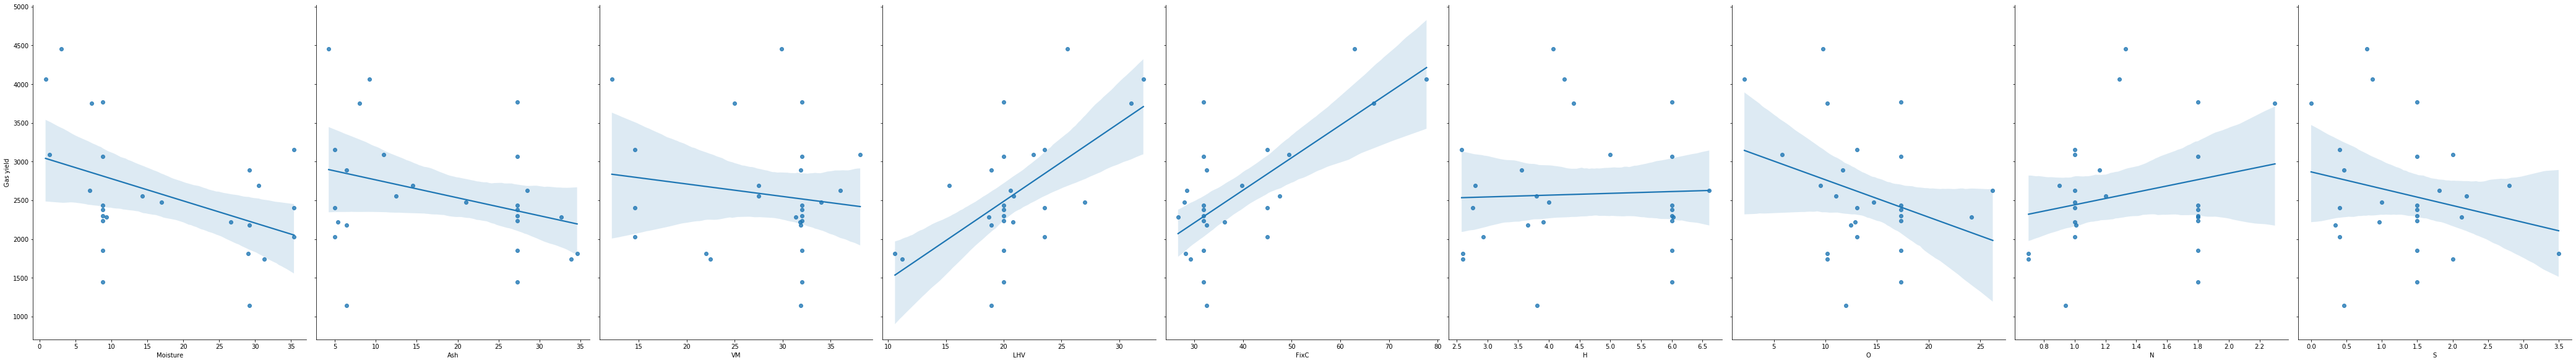

In [585]:
data7= pd.read_excel("Fields_Summary5.xlsx")
data7 = pd.get_dummies(data7, columns = ['Coal_Rank'])
data7 = pd.get_dummies(data7, columns = ['Location'])
data7.drop(["Injected Gas"], axis= 1, inplace= True)

data7.drop(["Coal Gasified", "Gas_Produced", 
                   "Thermal Power", "Gas_Injected", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
print(data7)
data7.dropna(inplace=True)
print(data7.isnull().sum())
sns.pairplot(data7, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'H', 'O', 'N', 'S'], 
             y_vars='Gas yield', height=8, aspect=0.8, kind='reg')

The gas yield value at the bottom is different from the one in excel. This is because the previous model I installed closed before it could save, there is some difference between the model I just installed and before. The previous was better.

In [596]:
X6= data7.drop(["Gas yield", "Moisture", "VM", "H", "O", "N", "S"], axis= 1)
y6= data7["Gas yield"]

X6_train, X6_test, y6_train, y6_test= train_test_split(X6,y6,test_size=0.50, random_state=40)

Linear6= LinearRegression()
DT6= DecisionTreeRegressor()
Linear6.fit(X6_train, y6_train)
DT6.fit(X6_train, y6_train)
print(Linear6.score(X6_test, y6_test))
print(DT6.score(X6_train, y6_train))



predict_data5= np.array([[21, 27, 28, 54, 9.7, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]])
Linear6.predict(predict_data5) 

0.6600692624848605
1.0


array([1869.06838257])

Moisture         0
Ash              0
VM               0
LHV              0
FixC             0
C                0
H                0
O                0
N                0
S                0
GHV              0
Gas yield        0
Coal Gasified    0
Gas_Produced     0
dtype: int64


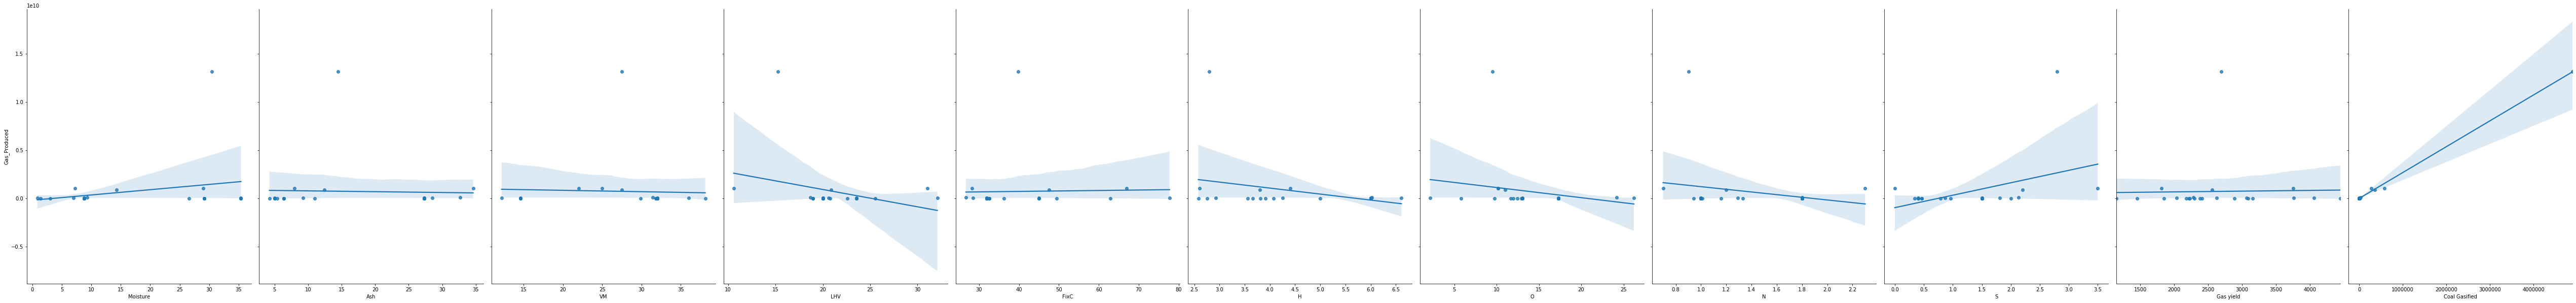

In [22]:
data8= pd.read_excel("Fields_Summary6.xlsx")

#data8 = pd.get_dummies(data8, columns = ['Coal_Rank'])
#data8 = pd.get_dummies(data8, columns = ['Location']) #burada enterasan işler döndü
data8.drop(["Injected Gas"], axis= 1, inplace= True)


data8.drop(["Coal_Rank", "Location", "Thermal Power", "Gas_Injected", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
data8.dropna(inplace=True)
print(data8.isnull().sum())
sns.pairplot(data8, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'H', 'O', 'N', 'S', 'Gas yield', 'Coal Gasified'], 
             y_vars='Gas_Produced', height=8, aspect=0.8, kind='reg')

In [597]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

X7= data8.drop(["Gas_Produced", "Moisture", "Ash", "VM", "LHV", "FixC", 'H', 'O', 'N', 'S'], axis= 1)
y7= data8["Gas_Produced"]

X7_train, X7_test, y7_train, y7_test= train_test_split(X7,y7,test_size=0.4, random_state=40)

Linear7= LinearRegression()
Linear7.fit(X7_train, y7_train)
DT7= DecisionTreeRegressor(splitter= "best", criterion= "friedman_mse")
DT7.fit(X7_train, y7_train)
print(Linear7.score(X7_test, y7_test))
print(DT7.score(X7_test, y7_test))

Linear7.coef_

predict_data6= np.array([[]])
#Linear7.predict(predict_data6) 


0.9955973481632957
0.00888143277716158


Moisture         0
Ash              0
VM               0
LHV              0
FixC             0
C                0
H                0
O                0
N                0
S                0
GHV              0
Gas yield        0
Coal Gasified    0
Gas_Produced     0
Thermal Power    0
Gas_Injected     0
dtype: int64


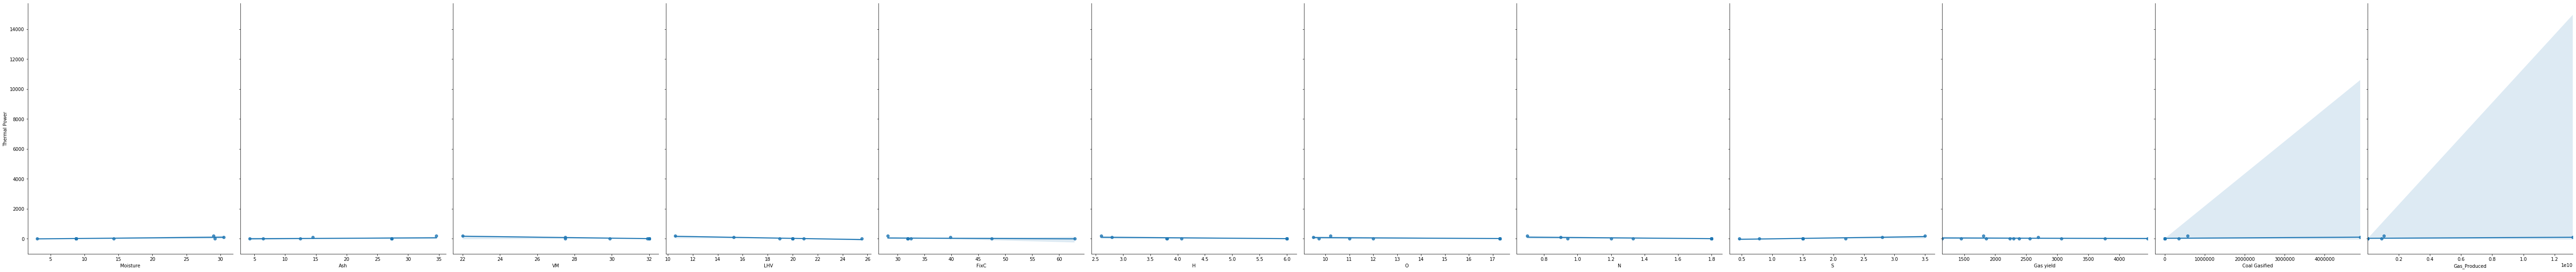

In [25]:
data9= pd.read_excel("Fields_Summary7.xlsx")

#data9 = pd.get_dummies(data9, columns = ['Coal_Rank'])
#data9 = pd.get_dummies(data9, columns = ['Location'])
data9.drop(["Injected Gas"], axis= 1, inplace= True)


data9.drop(["Coal_Rank", "Location", "Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
data9.dropna(inplace=True)
print(data9.isnull().sum())
sns.pairplot(data9, x_vars=['Moisture', 'Ash', 'VM', 'LHV', 'FixC', 'H', 'O', 'N', 'S', 'Gas yield', 'Coal Gasified', 'Gas_Produced'], 
             y_vars='Thermal Power', height=8, aspect=0.8, kind='reg')

Here, there is no good correlation between the thermal power column and any other column. Luckily, however, I have a formula for calculating thermal power, and I was able to fill in a missing thermal power data with the cells I filled earlier, but one was missing.

In [27]:
X8= data9.drop(["Thermal Power", "Moisture", "Ash", "VM", "LHV", "FixC",'C', 'H', 'O', 'N', 'S','GHV', 'Gas yield', 'Coal Gasified'], axis= 1)
y8= data9["Thermal Power"]

X8_train, X8_test, y8_train, y8_test= train_test_split(X8,y8,test_size=0.4, random_state=40)

Linear8= LinearRegression()
Linear8.fit(X8_train, y8_train)
DT8= DecisionTreeRegressor(splitter= "best", criterion= "friedman_mse")
DT8.fit(X8_train, y8_train)
print(Linear8.score(X8_test, y8_test))
print(DT8.score(X8_test, y8_test))    

Linear8.coef_

-539.385679466277
-0.7474461399665262


array([ 2.53763495e-06, -3.08481222e-03])

Moisture         0
Ash              0
VM               0
LHV              0
FixC             0
C                0
H                0
O                0
N                0
S                0
GHV              0
Gas yield        0
Coal Gasified    0
Gas_Produced     0
Thermal Power    0
Gas_Injected     0
dtype: int64


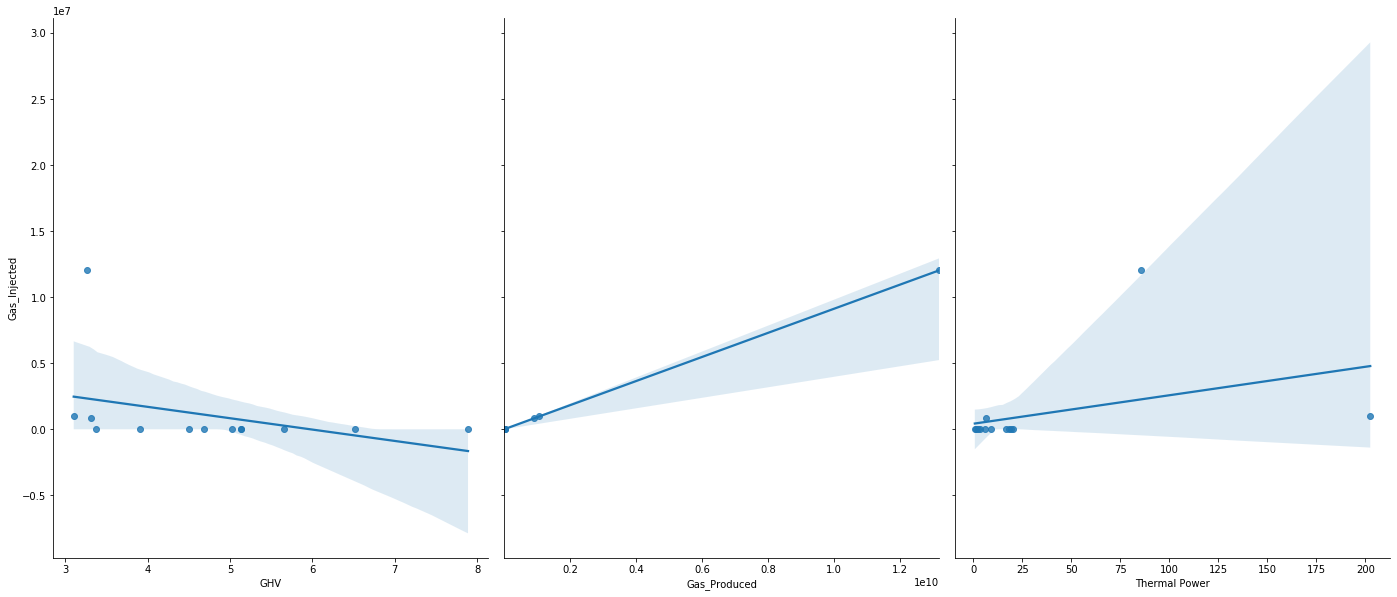

In [47]:
data10= pd.read_excel("Fields_Summary8.xlsx")

#data10 = pd.get_dummies(data10, columns = ['Coal_Rank'])
#data10 = pd.get_dummies(data10, columns = ['Location'])
data10.drop(["Injected Gas"], axis= 1, inplace= True)


data10.drop(["Location", "Coal_Rank","Injection_Rate", "Production_Rate"], axis= 1, inplace= True)
data10.dropna(inplace=True)
print(data10.isnull().sum())
sns.pairplot(data10, x_vars=['GHV','Gas_Produced', 'Thermal Power'], y_vars='Gas_Injected', height=8, aspect=0.8, kind='reg')

In [143]:
X9= data10.drop(["Gas_Injected", 'Ash', 'VM', 'LHV', 'FixC','C', 'H', 'O', 'N', 'S', 
                  'Thermal Power'], axis= 1)
y9= data10["Gas_Injected"]

X9_train, X9_test, y9_train, y9_test= train_test_split(X9,y9,test_size=0.4, random_state=40)

Linear9= LinearRegression()
Linear9.fit(X9_train, y9_train)
DT9= DecisionTreeRegressor(splitter= "best", criterion= "friedman_mse")
DT9.fit(X9_train, y9_train)
print(Linear9.score(X9_test, y9_test))
print(DT9.score(X9_test, y9_test))     

print(Linear9.coef_)

predict_data8= np.array([[35.40, 7.45, 2218, 3600, 7985352]])
print(Linear9.predict(predict_data8))


0.9525162623638759
-0.4931657553039115
[-3.50823897e+02  3.50554038e+03 -1.58208670e+00  1.68870289e+00
  2.86684361e-04]
[5048.24544289]


,Moisture,GHV,Gas yield,Coal Gasified,Gas_Produced
2,0.83,4.500000,4065.000000,2.590000e+01,1.643229e+07
3,3.04,3.380000,4454.390935,2.370395e+02,1.055867e+06
4,8.80,4.690000,2298.000000,4.000000e+03,7.590000e+06
5,8.80,5.660000,1448.482733,1.260000e+03,1.829269e+06
6,8.80,6.520000,2382.372917,2.520000e+03,6.017331e+06
7,8.80,5.140000,3067.375200,4.200000e+03,1.291248e+07
8,8.80,5.140000,3766.952000,2.850000e+03,1.076040e+07
9,8.80,3.910000,2232.850449,4.550000e+03,5.640717e+06
10,8.80,5.020000,1851.002276,1.334000e+03,2.469237e+06
14,29.20,7.890000,1145.577961,3.950000e+03,4.525033e+06


Moisture          0
Ash               0
VM                0
LHV               0
FixC              0
C                 0
H                 0
O                 0
N                 0
S                 0
GHV               0
Gas yield         0
Coal Gasified     0
Gas_Produced      0
Thermal Power     0
Gas_Injected      0
Injection_Rate    0
dtype: int64


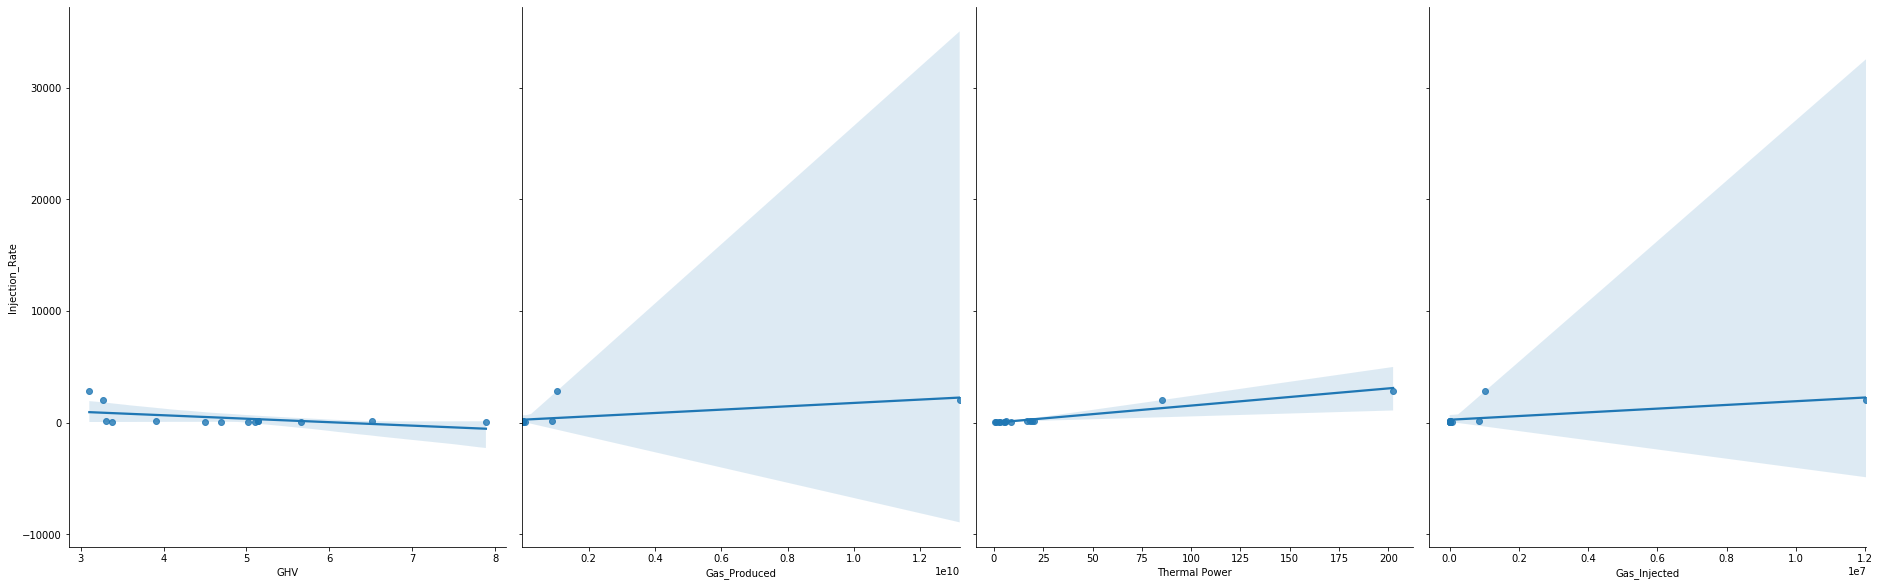

In [149]:
data11= pd.read_excel("Fields_Summary9.xlsx")

#data11 = pd.get_dummies(data11, columns = ['Coal_Rank'])
#data11 = pd.get_dummies(data11, columns = ['Location'])
data11.drop(["Injected Gas"], axis= 1, inplace= True)


data11.drop(["Location","Coal_Rank","Production_Rate"], axis= 1, inplace= True)
data11.dropna(inplace=True)
print(data11.isnull().sum())
sns.pairplot(data11, x_vars=['GHV','Gas_Produced', 'Thermal Power', 'Gas_Injected'], y_vars='Injection_Rate', height=8, aspect=0.8, kind='reg')

In [183]:
X10= data11.drop(["Injection_Rate", "Moisture", "Ash", "VM", "LHV", "FixC", "C","H","O","N","S", "GHV",
                 "Gas yield", "Coal Gasified", "Gas_Produced", "Gas_Injected"], axis= 1)
y10= data11["Injection_Rate"]

X10_train, X10_test, y10_train, y10_test= train_test_split(X10,y10,test_size=0.5, random_state=50)

Linear10= LinearRegression()
Linear10.fit(X10_train, y10_train)
DT10= DecisionTreeRegressor(splitter= "best", criterion= "friedman_mse")
DT10.fit(X10_train, y10_train)
print(Linear10.score(X10_test, y10_test))
print(DT10.score(X10_test, y10_test))     

print(Linear10.coef_)

predict_data9= np.array([[11.48]])
print(Linear10.predict(predict_data9))

0.7548414863916483
-0.07112298244672344
[14.05824555]
[120.64842138]


Moisture           0
Ash                0
VM                 0
LHV                0
FixC               0
C                  0
H                  0
O                  0
N                  0
S                  0
GHV                0
Gas yield          0
Coal Gasified      0
Gas_Produced       0
Thermal Power      0
Gas_Injected       0
Injection_Rate     0
Production_Rate    0
dtype: int64


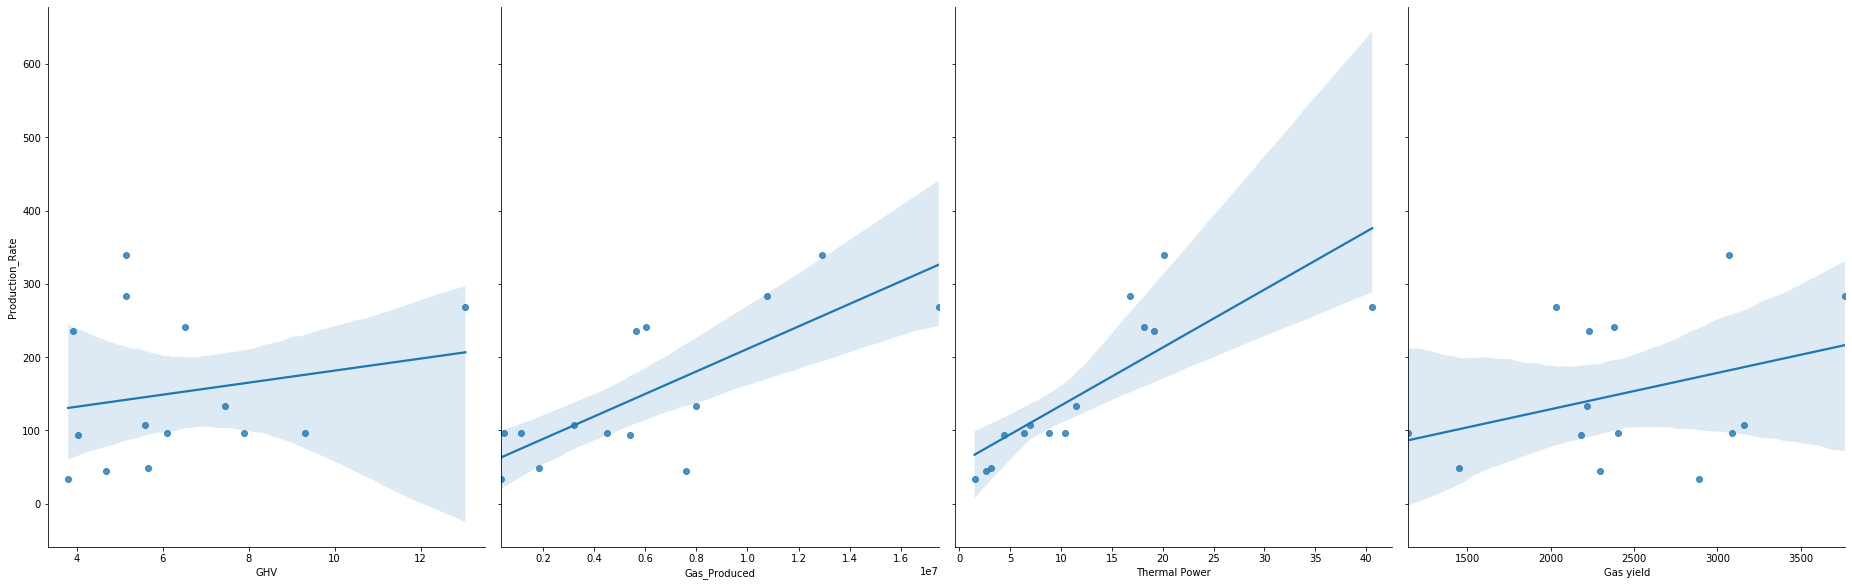

In [291]:
data12= pd.read_excel("Fields_Summary10.xlsx")

#data12 = pd.get_dummies(data12, columns = ['Coal_Rank'])
#data12 = pd.get_dummies(data12, columns = ['Location'])
data12.drop(["Injected Gas", "Location"], axis= 1, inplace= True)


data12.drop(["Coal_Rank"], axis= 1, inplace= True)
data12.dropna(inplace=True)
print(data12.isnull().sum())
sns.pairplot(data12, x_vars=['GHV','Gas_Produced', 'Thermal Power', 'Gas yield'],
             y_vars='Production_Rate', height=8, aspect=0.8, kind='reg')

In [422]:
X11= data12.drop(["Production_Rate", "Moisture", "Ash", "VM", "LHV", 
                  "FixC", "C","H","O","N","S", "Gas yield", "Gas_Injected", "Injection_Rate"], axis= 1)
y11= data12["Production_Rate"]

X11_train, X11_test, y11_train, y11_test= train_test_split(X11,y11,test_size=0.5, random_state=50)

Linear11= LinearRegression()
Linear11.fit(X11_train, y11_train)
DT11= DecisionTreeRegressor(criterion= "friedman_mse")
DT11.fit(X11_train, y11_train)
print(Linear11.score(X11_train, y11_train))
print(DT11.score(X11_test, y11_test))     

print(Linear11.coef_)

predict_data10= np.array([[3.31, 352500, 900800000, 6.25]])
print(Linear11.predict(predict_data10))

data12.isnull().sum()
X11

0.9999139353351774
0.7502518817044984
[-1.49754027e+01 -2.50935783e-02  1.05167151e-05  1.27845870e+01]
[761.88919551]


,GHV,Coal Gasified,Gas_Produced,Thermal Power
4,4.69,4000.0,7.590000e+06,2.620000
5,5.66,1260.0,1.829269e+06,3.146320
6,6.52,2520.0,6.017331e+06,18.121917
7,5.14,4200.0,1.291248e+07,20.168889
8,5.14,2850.0,1.076040e+07,16.807407
9,3.91,4550.0,5.640717e+06,19.156793
11,6.10,350.0,1.155328e+06,6.358873
12,3.80,129.0,3.737824e+05,1.491085
13,4.02,2480.0,5.419845e+06,4.337881
14,7.89,3950.0,4.525033e+06,8.791989


In [606]:
from sklearn.tree import DecisionTreeClassifier
data13= pd.read_excel("Fields_Summary10.xlsx")

data13 = pd.get_dummies(data13, columns = ['Coal_Rank'])
data13 = pd.get_dummies(data13, columns = ['Location'])

data13.dropna(inplace=True)
X12= data13.drop(["Injected Gas"], axis= 1)
y12= data13["Injected Gas"]

X12_train, X12_test, y12_train, y12_test= train_test_split(X12,y12,test_size=0.50, random_state=70)

model= LogisticRegression(C= 0.5, max_iter= 8000)
dt_model= DecisionTreeClassifier()

model.fit(X12_train, y12_train)
dt_model.fit(X12_train, y12_train)

print(model.score(X12_test, y12_test))
print(dt_model.score(X12_test, y12_test))
y12_test

0.8181818181818182
0.7272727272727273


3     Air/O2
9        Air
5        Air
20       Air
10       Air
16    Air/O2
11       Air
15       Air
12       Air
6        Air
2        Air
Name: Injected Gas, dtype: object

In [530]:
from sklearn import metrics

prediction = model.predict(X12_test)

cm = metrics.confusion_matrix(y_true=y12_test, 
                         y_pred = prediction, 
                        labels = model.classes_)

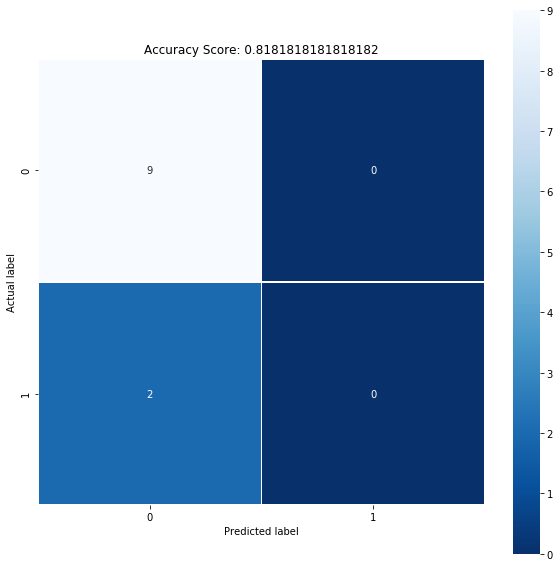

In [531]:
import seaborn as sns

score = model.score(X12_test, y12_test) 

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

Here, for control purposes, I predicted a case whose outcome I knew, and the result was correct.

In [607]:
predict_data11= np.array([[9.3, 32.7, 31.4, 18.7, 26.7, 71.41, 6.02, 24.16, 1.8,
                          2.13, 5.1, 2286, 35000, 80000000, 5.25, 79530, 13.44,
                          57.4, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]])
print(model.predict(predict_data11))


['Air']


In [546]:
model.coef_

array([[-1.40546031e-16, -5.11469856e-16, -5.41160089e-16,
        -2.64326707e-16, -3.66849336e-16, -1.10471583e-15,
        -9.41679716e-17, -3.16697587e-16, -2.41028587e-17,
        -3.05720259e-17, -4.86907117e-17, -4.48138696e-14,
        -5.93738098e-13, -2.96118394e-10, -6.04256550e-16,
        -2.67824452e-13, -7.04047487e-15, -1.96288311e-15,
         3.46910070e-18, -9.54559024e-18, -2.85835236e-18,
         0.00000000e+00, -6.32850692e-18, -6.33655200e-18,
         0.00000000e+00,  0.00000000e+00, -9.53754516e-18,
         6.10748338e-19]])

# Result

My main goal in this dataset was to fill in the missing data cells and prepare them for future analysis. Of course, I didn't expect the results to be perfect, but the results I got were above my expectation. Thanks to the models I applied, I saw that the data set is suitable for both classification and linear regression. This will meet my needs.